In [1]:
#Importing the libraries 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics
import warnings


warnings.filterwarnings('ignore')


In [2]:
#Importing the dataset
insurance = pd.read_csv("insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
7      37  female  27.740         3     no  northwest   7281.50560
8      37    male  29.830         2     no  northeast   6406.41070
9      60  female  25.840         0     no  northwest  28923.13692
10     25    male  26.220         0     no  northeast   2721.32080
11     62  female  26.290         0    yes  southeast  27808.72510
12     23    male  34.400         0     no  southwest   1826.84300
13     56  female  39.820     

In [5]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Data distribution analysis


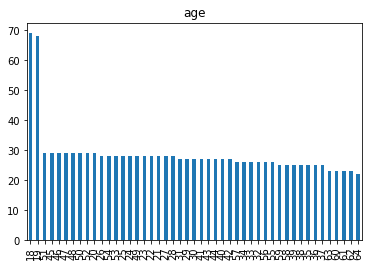

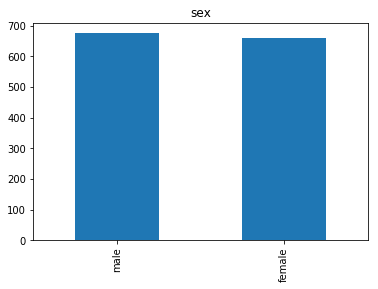

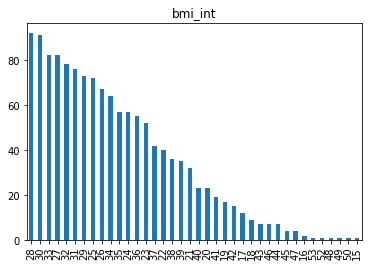

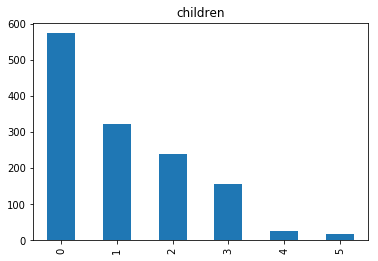

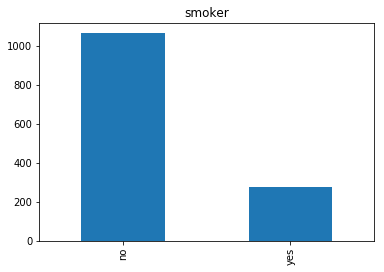

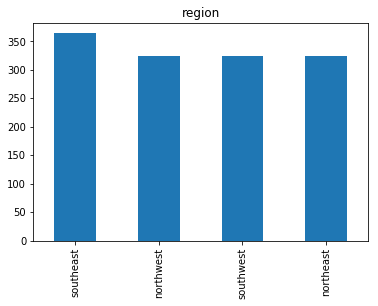

In [6]:
insurance['bmi_int'] = insurance['bmi'].apply(lambda x: int(x))
variables = ['age','sex','bmi_int','children','smoker','region']


#Distribution of the different variables in the data
print('Data distribution analysis')
for v in variables:
    insurance = insurance.sort_values(by=[v])
    insurance[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

Variables pairplot:


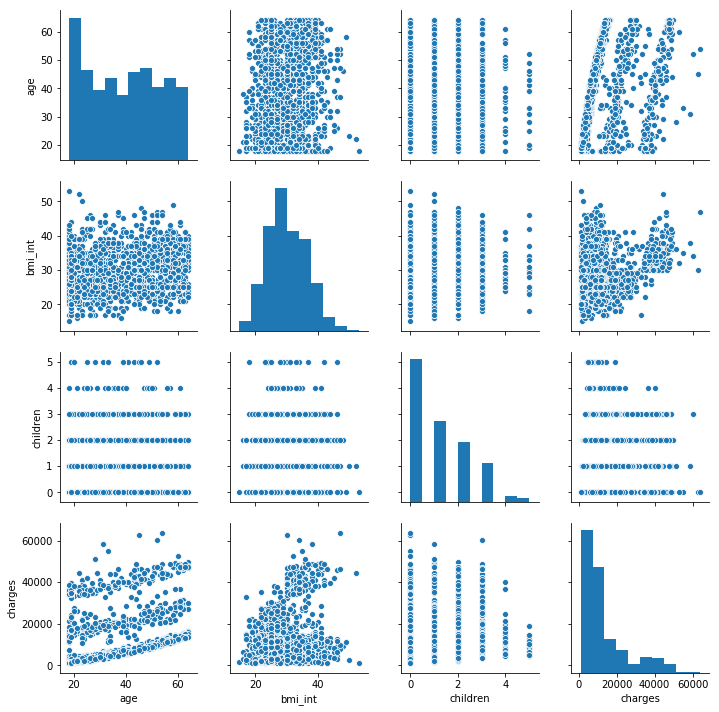

In [20]:
#Creating pairplots with seaborn to visualize the distribution of each variables and relationship between the two variables

print('Variables pairplot:')
variables = ['age','sex','bmi_int','children','smoker','region','charges']
sns_plot = sns.pairplot(insurance[variables])
plt.show()


In [7]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,bmi_int
172,18,male,15.960,0,no,northeast,1694.79640,15
179,41,female,33.155,3,no,northeast,8538.28845,33
495,20,male,27.930,0,no,northeast,1967.02270,27
645,48,male,30.780,3,no,northeast,10141.13620,30
366,56,female,32.300,3,no,northeast,13430.26500,32


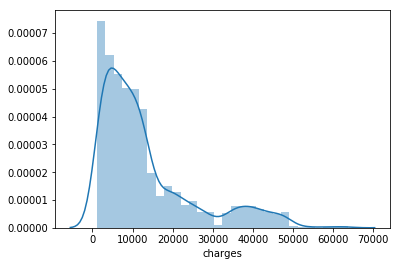

In [8]:
#Checking the distribution of the target variable : charges

sns.distplot(insurance['charges'])

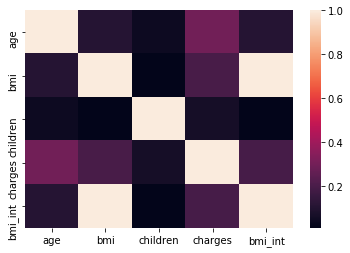

In [9]:
#Heatmap using seaborn

sns.heatmap(insurance.corr())

In [10]:
X = insurance[['age', 'bmi_int', 'children']] 
y = insurance['charges']

#Splitting the data into train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

#Running Linear regression model
lm = LinearRegression()

#Fitting the model
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
#Printing the intercept value 

print(lm.intercept_)

-7406.454694041113


In [12]:
#Checking the value of the predictors
coeff_insurance = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_insurance

,Coefficient
age,217.699604
bmi_int,382.899835
children,609.847024


In [13]:
#Predicting on the test set 

predictions = lm.predict(X_test)

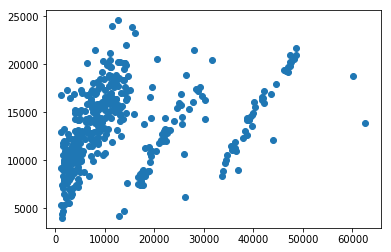

In [14]:
plt.scatter(y_test,predictions)

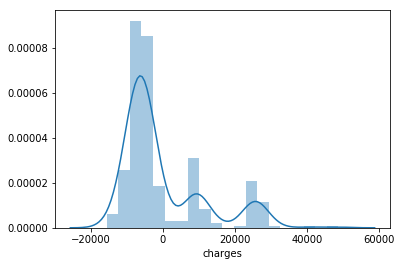

In [15]:
sns.distplot((y_test-predictions),bins=20);

In [16]:
from sklearn import metrics

#Mean Absolute Error,Mean Square Error,Root Mean Square Error 

print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Test RMSE: 11502.699122807855


In [17]:
#transforming the categorical variables in the dataset using label encoder
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

insurance['sex'] = le_sex.fit_transform(insurance['sex'])
insurance['smoker'] = le_smoker.fit_transform(insurance['smoker'])
insurance['region'] = le_region.fit_transform(insurance['region'])


In [18]:
X = insurance[variables]
sc = StandardScaler()
X = sc.fit_transform(X) 
Y = insurance['charges']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


In [19]:
#training the extra regressor model 
regressor = ExtraTreesRegressor(n_estimators = 200)
regressor.fit(X_train,y_train)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [20]:
#prediction and evaluation
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('ExtraTreesRegressor evaluating result:')

print("Test RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

ExtraTreesRegressor evaluating result:
Test RMSE:  4746.935894543862


In [23]:
#Let's try and predict on the new data

print('Predicting on new data\n\n')

barney = ['male','yes','southeast',25,30.5,2]
print('Barney - ',str(barney))

barney[0] = le_sex.transform([barney[0]])[0] 
barney[1] = le_smoker.transform([barney[1]])[0] 
barney[2] = le_region.transform([barney[2]])[0] 

X = sc.transform([barney])

cost_for_barney = regressor.predict(X)[0]
print('Cost for Barney = ',cost_for_barney,'\n\n')


donna = ['female','no','southeast',45,19,0]
print('Donna - ',str(donna))

donna[0] = le_sex.transform([donna[0]])[0] 
donna[1] = le_smoker.transform([donna[1]])[0] 
donna[2] = le_region.transform([donna[2]])[0] 

X = sc.transform([donna])

cost_for_donna = regressor.predict(X)[0]

print('Cost for Donna = ',cost_for_donna)

Predicting on new data


Barney -  ['male', 'yes', 'southeast', 25, 30.5, 2]
Cost for Barney =  18600.679033699973 


Donna -  ['female', 'no', 'southeast', 45, 19, 0]
Cost for Donna =  14171.768191249952
